In [24]:
# Dependencies
from config import login_pwd
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from sqlalchemy import create_engine
engine = create_engine(f'postgresql://{login_pwd}@localhost:5432/EmployeeSQL')
connection = engine.connect()



In [26]:
salary = pd.read_sql("SELECT * FROM salaries", connection)
salary.head()


,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


Text(0.5, 1.0, 'Salary Distribution - Employees')

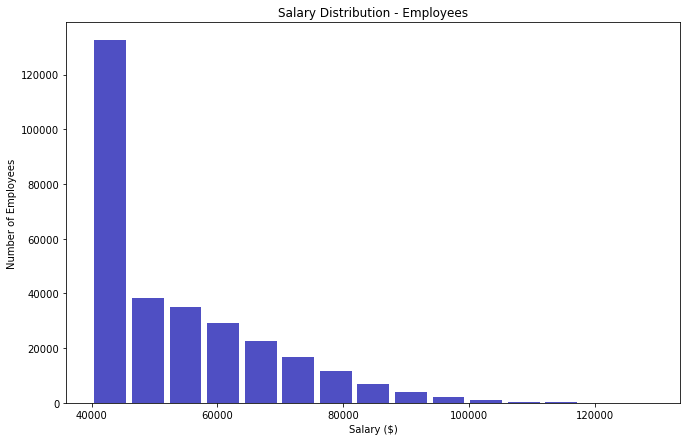

In [50]:
plt.figure(figsize=(11,7))

plt.hist(salary['salary'], bins=15, color='#0504aa',alpha=0.7, rwidth=0.85)
binwidth=12
plt.xlabel('Salary ($)')
plt.ylabel('Number of Employees')
plt.title('Salary Distribution - Employees')
